In [1]:
!pip install numpy sentence-transformers scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 39.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 36.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 29.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 45.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 35.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 8.4 MB/s eta 0:00:00


In [3]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

print("Bibliotecas importadas.")

Bibliotecas importadas.


In [4]:
print("Cargando modelo de embedding (all-MiniLM-L6-v2)...")
model = SentenceTransformer("all-MiniLM-L6-v2")
print("Modelo cargado.")

Cargando modelo de embedding (all-MiniLM-L6-v2)...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


Modelo cargado.


In [5]:
sentences = [
    "El rápido zorro marrón salta sobre el perro perezoso.",
    "La inteligencia artificial está cambiando nuestro mundo.",
    "Amo la programación y el desarrollo de software.",
    "Los modelos de lenguaje pueden generar texto coherente.",
    "El clima de hoy es soleado y cálido.",
    "Un canino ágil brinca sobre el can pasivo.", # Semánticamente similar a la primera
    "La IA tiene un gran impacto en la sociedad.", # Semánticamente similar a la segunda
    "Disfruto codificando y creando aplicaciones.", # Semánticamente similar a la tercera
]

In [6]:
print("\nGenerando embeddings para las frases...")
embeddings = model.encode(sentences)
# Los embeddings son arrays de NumPy
print(f"Forma de la matriz de embeddings: {embeddings.shape}") # (num_sentences, embedding_dimension)
print(f"Dimensión de cada embedding: {embeddings.shape[1]}")


Generando embeddings para las frases...
Forma de la matriz de embeddings: (8, 384)
Dimensión de cada embedding: 384


In [7]:
# 4. Calcular la similitud semántica
print("\n--- Cálculo de Similitud Semántica ---")

# Comparar la primera frase con todas las demás, incluyendo ella misma
emb1 = embeddings[0].reshape(1, -1) # El embedding de la primera frase

# Similitud del Coseno
cosine_sim_matrix = cosine_similarity(emb1, embeddings)
print("\nSimilitud del Coseno entre la frase 1 y todas las demás:")
for i, sentence in enumerate(sentences):
    print(f"  Con '{sentence}': {cosine_sim_matrix[0, i]:.4f}")

# Distancia Euclidiana
# Nota: Menor distancia = mayor similitud
euclidean_dist_matrix = euclidean_distances(emb1, embeddings)
print("\nDistancia Euclidiana entre la frase 1 y todas las demás:")
for i, sentence in enumerate(sentences):
    print(f"  Con '{sentence}': {euclidean_dist_matrix[0, i]:.4f}")

# Encontrar la frase más similar a la primera (excluyéndola a ella misma)
print(f"\nBuscando la frase más similar a: '{sentences[0]}'")
similarities_to_first = cosine_similarity(embeddings[0].reshape(1, -1), embeddings[1:])
most_similar_index_in_rest = np.argmax(similarities_to_first)
# El índice devuelto es relativo a embeddings[1:], así que sumamos 1 para el índice original
original_index_of_most_similar = most_similar_index_in_rest + 1

print(f"La frase más similar es: '{sentences[original_index_of_most_similar]}' (Similitud Coseno: {similarities_to_first[0, most_similar_index_in_rest]:.4f})")


--- Cálculo de Similitud Semántica ---

Similitud del Coseno entre la frase 1 y todas las demás:
  Con 'El rápido zorro marrón salta sobre el perro perezoso.': 1.0000
  Con 'La inteligencia artificial está cambiando nuestro mundo.': 0.4371
  Con 'Amo la programación y el desarrollo de software.': 0.3061
  Con 'Los modelos de lenguaje pueden generar texto coherente.': 0.2474
  Con 'El clima de hoy es soleado y cálido.': 0.6320
  Con 'Un canino ágil brinca sobre el can pasivo.': 0.5552
  Con 'La IA tiene un gran impacto en la sociedad.': 0.4577
  Con 'Disfruto codificando y creando aplicaciones.': 0.4899

Distancia Euclidiana entre la frase 1 y todas las demás:
  Con 'El rápido zorro marrón salta sobre el perro perezoso.': 0.0000
  Con 'La inteligencia artificial está cambiando nuestro mundo.': 1.0610
  Con 'Amo la programación y el desarrollo de software.': 1.1781
  Con 'Los modelos de lenguaje pueden generar texto coherente.': 1.2268
  Con 'El clima de hoy es soleado y cálido.': 0.857

In [8]:
# ... (código anterior)

# 5. Búsqueda Semántica Simple
print("\n--- Búsqueda Semántica Simple ---")
corpus_sentences = [
    "El cambio climático es un desafío global urgente.",
    "La energía solar es una fuente de energía renovable y limpia.",
    "Los bosques tropicales son vitales para la biodiversidad del planeta.",
    "La deforestación contribuye a la pérdida de hábitats.",
    "Reciclar ayuda a reducir la contaminación ambiental."
]

print("Corpus de búsqueda:")
for s in corpus_sentences: print(f"  - {s}")

corpus_embeddings = model.encode(corpus_sentences)

query = "¿Cómo podemos proteger el medio ambiente?"
query_embedding = model.encode([query])

# Calcular similitudes del coseno entre la consulta y el corpus
similarities = cosine_similarity(query_embedding, corpus_embeddings)

# Encontrar el índice de la frase más similar
most_similar_idx = np.argmax(similarities)

print(f"\nConsulta: '{query}'")
print(f"Frase más similar encontrada en el corpus: '{corpus_sentences[most_similar_idx]}'")
print(f"Similitud del Coseno: {similarities[0, most_similar_idx]:.4f}")


--- Búsqueda Semántica Simple ---
Corpus de búsqueda:
  - El cambio climático es un desafío global urgente.
  - La energía solar es una fuente de energía renovable y limpia.
  - Los bosques tropicales son vitales para la biodiversidad del planeta.
  - La deforestación contribuye a la pérdida de hábitats.
  - Reciclar ayuda a reducir la contaminación ambiental.

Consulta: '¿Cómo podemos proteger el medio ambiente?'
Frase más similar encontrada en el corpus: 'La energía solar es una fuente de energía renovable y limpia.'
Similitud del Coseno: 0.5142



--- Visualización de Embeddings (Opcional) ---
Aplicando PCA para reducir a 2 dimensiones...
Aplicando t-SNE para reducir a 2 dimensiones... (puede tardar un poco)


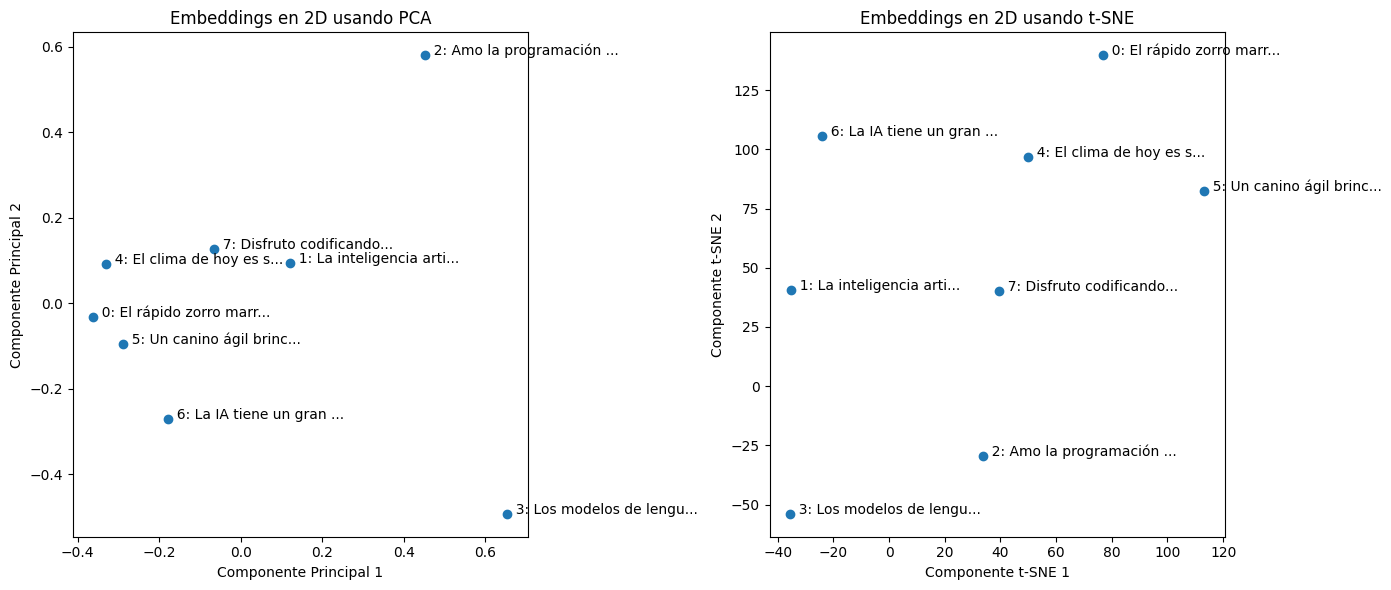

In [11]:
print("\n--- Visualización de Embeddings (Opcional) ---")

try:
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt

    # Usaremos los embeddings generados en el Paso 2
    # Reducción a 2D usando PCA
    print("Aplicando PCA para reducir a 2 dimensiones...")
    pca = PCA(n_components=2)
    embeddings_2d_pca = pca.fit_transform(embeddings)

    # Reducción a 2D usando t-SNE (puede ser más lento pero a menudo mejor para visualización)
    print("Aplicando t-SNE para reducir a 2 dimensiones... (puede tardar un poco)")
    tsne = TSNE(n_components=2, random_state=42, perplexity=min(5, len(embeddings)-1)) # Ajustar perplexity
    embeddings_2d_tsne = tsne.fit_transform(embeddings)

    # Graficar
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(embeddings_2d_pca[:, 0], embeddings_2d_pca[:, 1])
    for i, txt in enumerate(sentences):
        plt.annotate(f"  {i}: {txt[:20]}...", (embeddings_2d_pca[i, 0], embeddings_2d_pca[i, 1]))
    plt.title("Embeddings en 2D usando PCA")
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")

    plt.subplot(1, 2, 2)
    plt.scatter(embeddings_2d_tsne[:, 0], embeddings_2d_tsne[:, 1])
    for i, txt in enumerate(sentences):
        plt.annotate(f"  {i}: {txt[:20]}...", (embeddings_2d_tsne[i, 0], embeddings_2d_tsne[i, 1]))
    plt.title("Embeddings en 2D usando t-SNE")
    plt.xlabel("Componente t-SNE 1")
    plt.ylabel("Componente t-SNE 2")

    plt.tight_layout()
    # Para guardar la figura:
    # plt.savefig("embeddings_visualization.png")
    # print("Visualización guardada como embeddings_visualization.png")
    # Para mostrar la figura en entornos interactivos (como Jupyter):
    plt.show() 
    # En un script normal, plt.show() bloqueará la ejecución hasta que se cierre la ventana.
    # Puedes comentarlo si ejecutas el script de forma no interactiva y solo guardas la imagen.

except ImportError:
    print("Skipping visualization: scikit-learn o matplotlib no están instalados.")
except Exception as e:
    print(f"Error durante la visualización: {e}")